In [1]:
import numpy as np
import pandas as pd




#------------------------------------Plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import joblib 


# Generate Images,

Gráfica guardada en: 'recovery_curve_high_res.png'


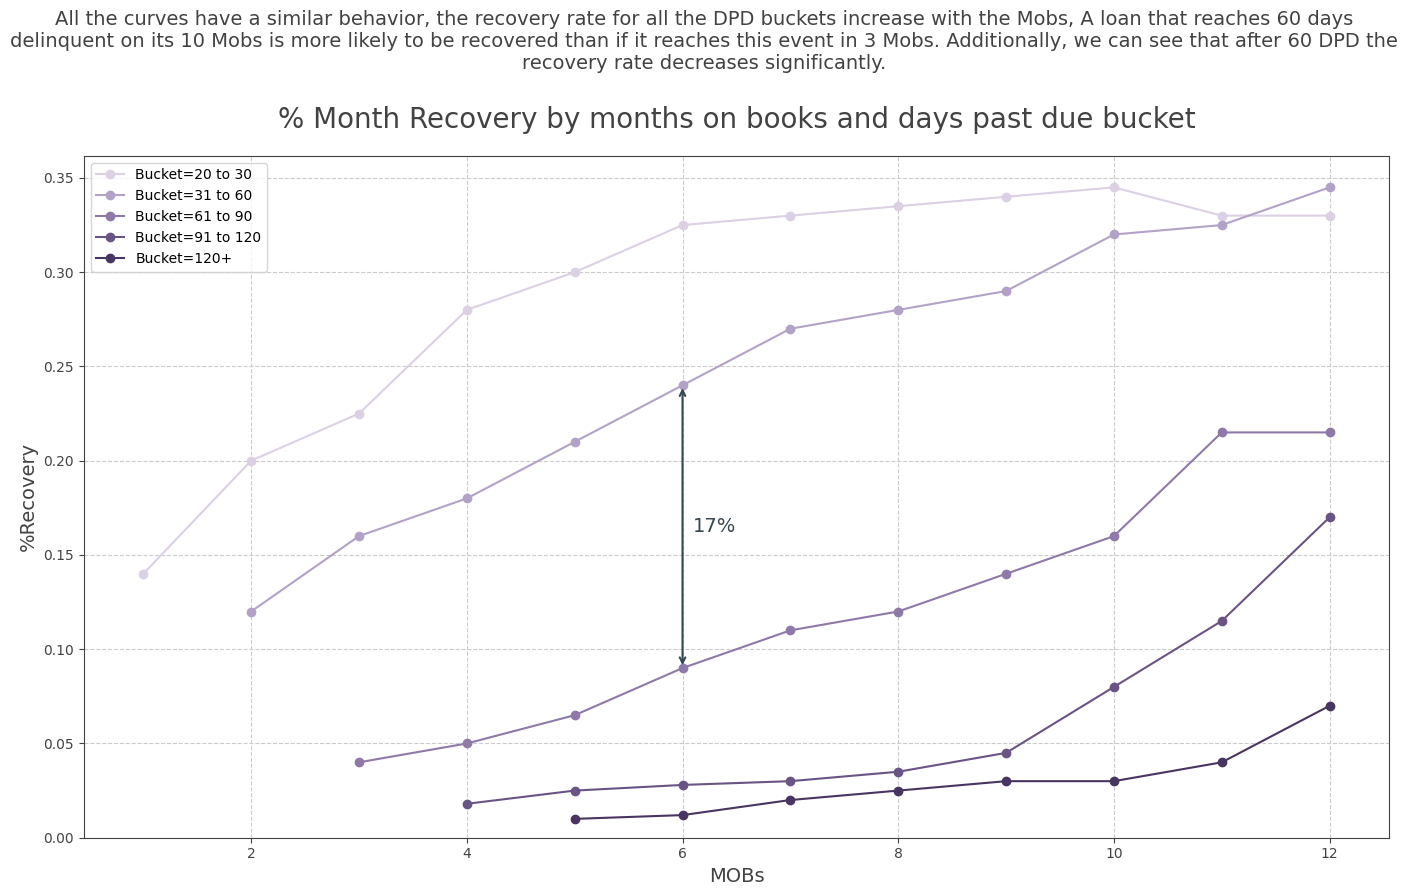

In [13]:

color_palette = {
    'text': '#424242',
    'grid': '#cccccc', # Un gris un poco más visible sobre fondo blanco
    'line1': '#dcd0e5', 
    'line2': '#b3a2c7',
    'line3': '#8e79a8',
    'line4': '#695485',
    'line5': '#483561',
    'arrow': '#37474f'
}

# --- Datos ---
mobs_blue = np.arange(1, 13)
mobs_pink = np.arange(2, 13)
mobs_red = np.arange(3, 13)
mobs_purple = np.arange(4, 13)
mobs_black = np.arange(5, 13)

rec_blue = [0.14, 0.20, 0.225, 0.28, 0.30, 0.325, 0.33, 0.335, 0.34, 0.345, 0.33, 0.33]
rec_pink = [0.12, 0.16, 0.18, 0.21, 0.24, 0.27, 0.28, 0.29, 0.32, 0.325, 0.345]
rec_red = [0.04, 0.05, 0.065, 0.09, 0.11, 0.12, 0.14, 0.16, 0.215, 0.215]
rec_purple = [0.018, 0.025, 0.028, 0.03, 0.035, 0.045, 0.08, 0.115, 0.17] 
rec_black = [0.01, 0.012, 0.02, 0.025, 0.03, 0.03, 0.04, 0.07]

# --- Creación de la Gráfica ---
fig, ax = plt.subplots(figsize=(14, 9))
# NO se establece color de fondo para que sea transparente al guardar

# Dibujar cada serie de datos
ax.plot(mobs_blue, rec_blue, marker='o', linestyle='-', color=color_palette['line1'], label='Bucket=20 to 30')
ax.plot(mobs_pink, rec_pink, marker='o', linestyle='-', color=color_palette['line2'], label='Bucket=31 to 60')
ax.plot(mobs_red, rec_red, marker='o', linestyle='-', color=color_palette['line3'], label='Bucket=61 to 90')
ax.plot(mobs_purple, rec_purple, marker='o', linestyle='-', color=color_palette['line4'], label='Bucket=91 to 120')
ax.plot(mobs_black, rec_black, marker='o', linestyle='-', color=color_palette['line5'], label='Bucket=120+')

# --- Anotaciones y Etiquetas ---
commentary = (
    "All the curves have a similar behavior, the recovery rate for all the DPD buckets increase with the Mobs,"
    " A loan that reaches 60 days delinquent on its 10 Mobs is more likely to be recovered than if it reaches this event in 3 Mobs. "
    "Additionally, we can see that after 60 DPD the recovery rate decreases significantly."
)
fig.text(0.5, 0.99, commentary, ha='center', va='top', fontsize=14, wrap=True, color=color_palette['text'])

ax.set_title("% Month Recovery by months on books and days past due bucket", fontsize=20, pad=20, color=color_palette['text'])
ax.set_xlabel("MOBs", fontsize=14, color=color_palette['text'])
ax.set_ylabel("%Recovery", fontsize=14, color=color_palette['text'])

# Anotación de la flecha
ax.annotate(
    '', xy=(6, 0.09), xycoords='data',
    xytext=(6, 0.24), textcoords='data',
    arrowprops=dict(arrowstyle='<->', color=color_palette['arrow'], lw=1.5)
)
ax.text(6.1, (0.09 + 0.24) / 2, '17%', ha='left', va='center', fontsize=14, color=color_palette['arrow'])

# --- Toques Finales ---
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', color=color_palette['grid'])
ax.set_ylim(0)

ax.tick_params(colors=color_palette['text'], which='both')
for spine in ax.spines.values():
    spine.set_edgecolor(color_palette['text'])

plt.tight_layout(rect=[0, 0, 1, 0.90])

# --- GUARDAR LA IMAGEN PARA OVERLEAF/LATEX ---
# Se guarda con fondo transparente y alta resolución (300 DPI) para calidad de publicación
file_path = 'recovery_curve_high_res.png'
plt.savefig(file_path, dpi=300, transparent=True, bbox_inches='tight')

print(f"Gráfica guardada en: '{file_path}'")

# Mostrar la gráfica en el notebook
plt.show()

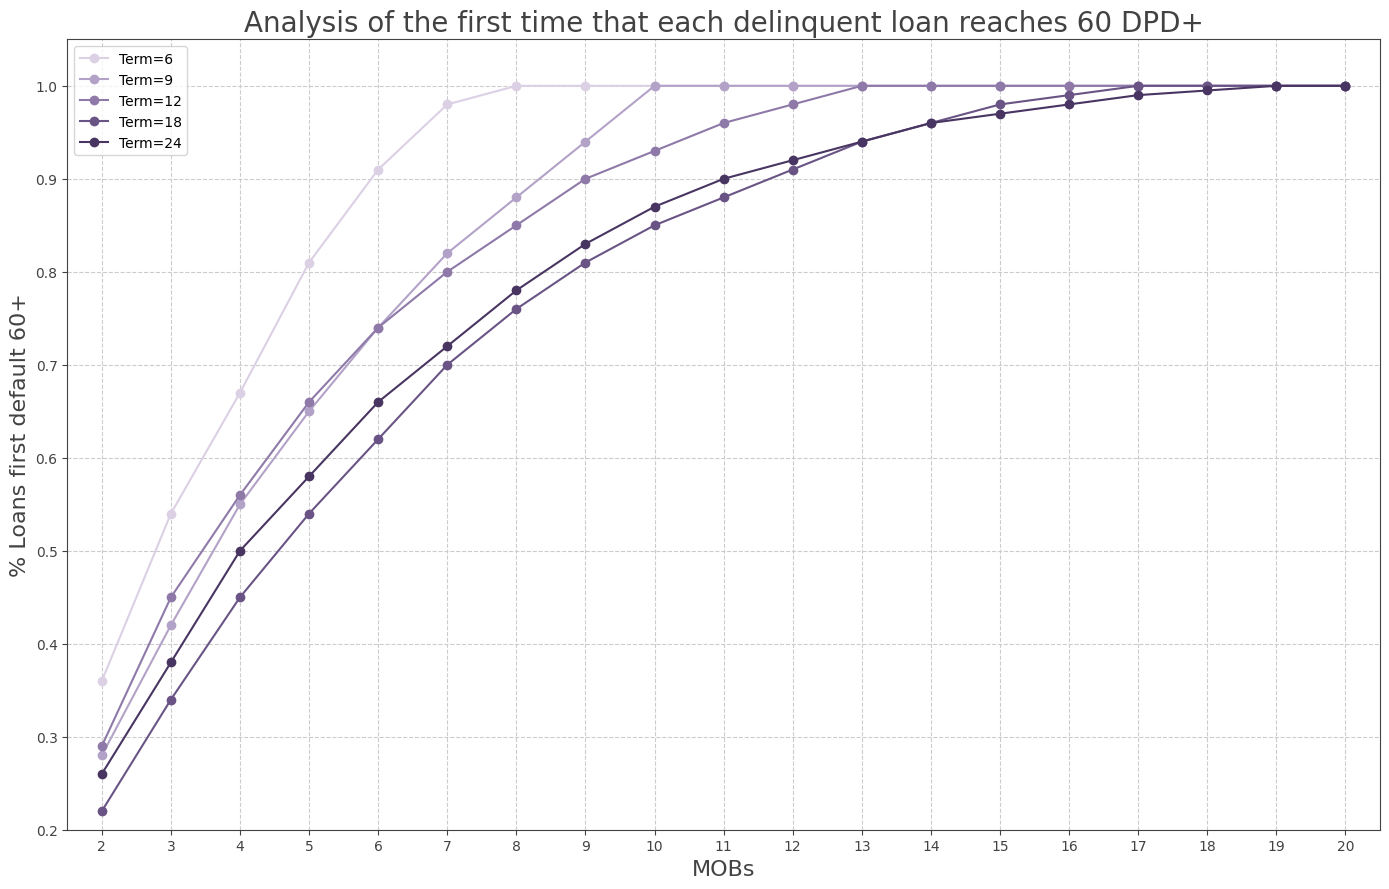

In [15]:

color_palette = {
    'text': '#424242',
    'grid': '#cccccc',
    'line1': '#dcd0e5', # Term=6 (más claro)
    'line2': '#b3a2c7', # Term=9
    'line3': '#8e79a8', # Term=12
    'line4': '#695485', # Term=18
    'line5': '#483561', # Term=24 (más oscuro)
}

# --- Datos Estimados de la Imagen ---
mobs = np.arange(2, 21)
term_6 = [0.36, 0.54, 0.67, 0.81, 0.91, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
term_9 = [0.28, 0.42, 0.55, 0.65, 0.74, 0.82, 0.88, 0.94, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
term_12 = [0.29, 0.45, 0.56, 0.66, 0.74, 0.8, 0.85, 0.9, 0.93, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
term_18 = [0.22, 0.34, 0.45, 0.54, 0.62, 0.7, 0.76, 0.81, 0.85, 0.88, 0.91, 0.94, 0.96, 0.98, 0.99, 1.0, 1.0, 1.0, 1.0]
term_24 = [0.26, 0.38, 0.5, 0.58, 0.66, 0.72, 0.78, 0.83, 0.87, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99, 0.995, 1.0, 1.0]

# --- Creación de la Gráfica ---
fig, ax = plt.subplots(figsize=(14, 9))

# Dibujar cada serie de datos con la paleta de morados
ax.plot(mobs, term_6, marker='o', linestyle='-', color=color_palette['line1'], label='Term=6')
ax.plot(mobs, term_9, marker='o', linestyle='-', color=color_palette['line2'], label='Term=9')
ax.plot(mobs, term_12, marker='o', linestyle='-', color=color_palette['line3'], label='Term=12')
ax.plot(mobs, term_18, marker='o', linestyle='-', color=color_palette['line4'], label='Term=18')
ax.plot(mobs, term_24, marker='o', linestyle='-', color=color_palette['line5'], label='Term=24')

# --- Títulos y Etiquetas ---
ax.set_title("Analysis of the first time that each delinquent loan reaches 60 DPD+", fontsize=20, color=color_palette['text'])
ax.set_xlabel("MOBs", fontsize=16, color=color_palette['text'])
ax.set_ylabel("% Loans first default 60+", fontsize=16, color=color_palette['text']) # Corregido "firts" a "first"

# --- Toques Finales ---
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', color=color_palette['grid'])
ax.set_xticks(np.arange(2, 21, 1)) # Asegurar que todos los MOBs se muestren como enteros
ax.set_ylim(0.2, 1.05)
ax.set_xlim(1.5, 20.5)

ax.tick_params(colors=color_palette['text'], which='both')
for spine in ax.spines.values():
    spine.set_edgecolor(color_palette['text'])

plt.tight_layout()



plt.show()

Gráfica guardada en: 'vintage_analysis_high_res.png'


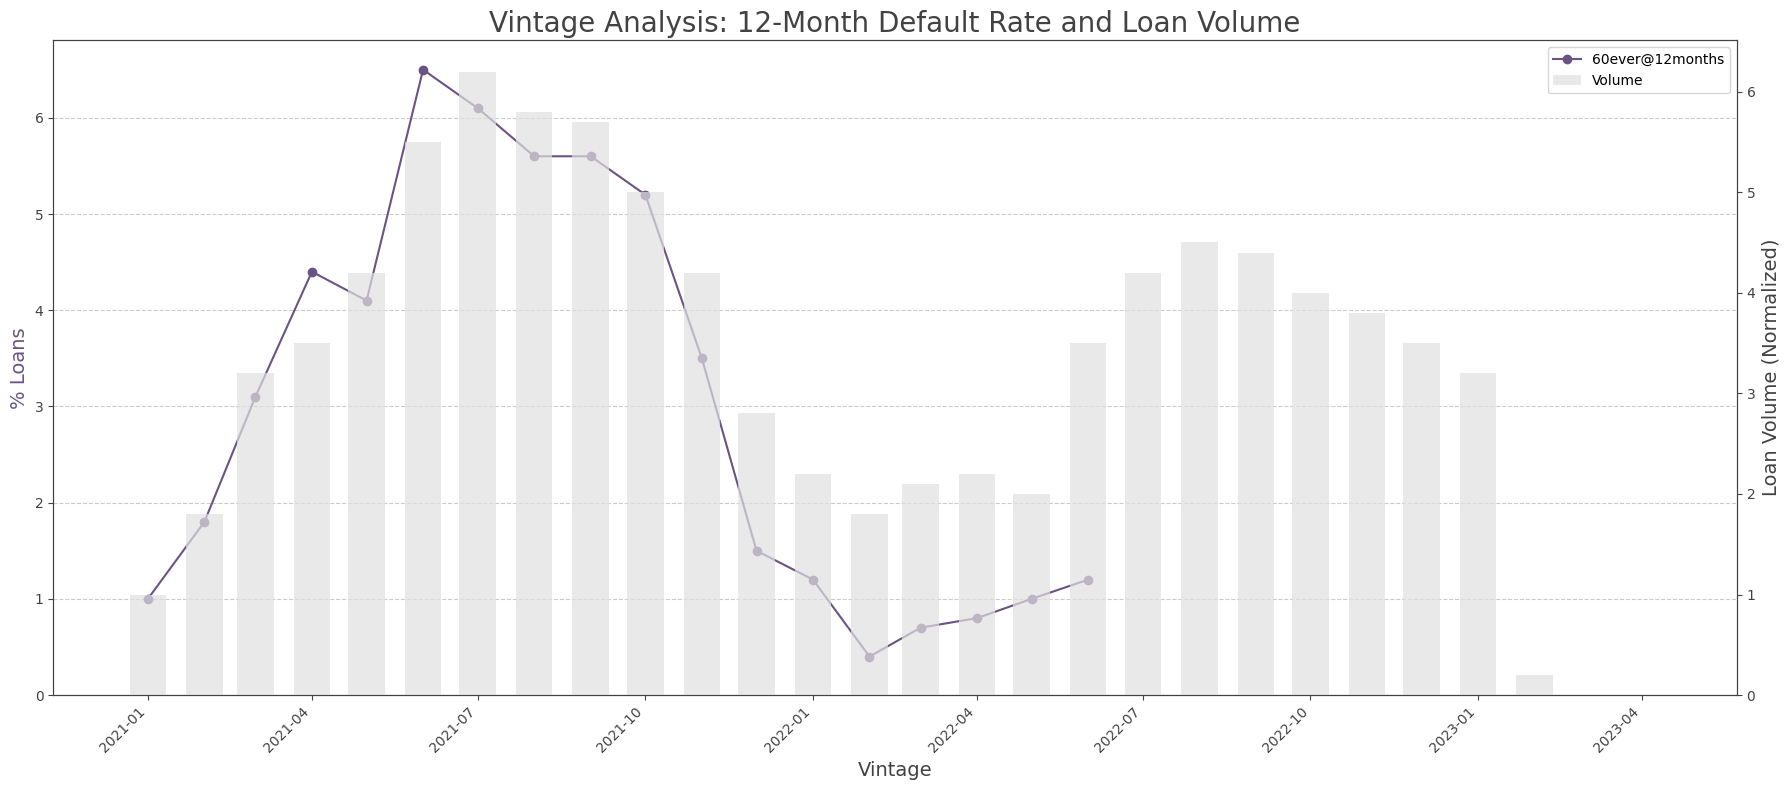

In [26]:

color_palette = {
    'text': '#424242',
    'grid': '#cccccc',

    'line': '#695485', 
    'bars': '#e0e0e0'
}

dates = pd.to_datetime(pd.date_range(start='2021-01-01', end='2023-04-01', freq='MS'))

bad_rate = [
    1.0, 1.8, 3.1, 4.4, 4.1, 6.5, 6.1, 5.6, 5.6, 5.2, 3.5, 1.5, 1.2, 
    0.4, 0.7, 0.8, 1.0, 1.2
]
bad_rate.extend([np.nan] * (len(dates) - len(bad_rate)))

volume = [
    1.0, 1.8, 3.2, 3.5, 4.2, 5.5, 6.2, 5.8, 5.7, 5.0, 4.2, 2.8, 2.2, 
    1.8, 2.1, 2.2, 2.0, 3.5, 4.2, 4.5, 4.4, 4.0, 3.8, 3.5, 3.2, 0.2, 0.0, 0.0
]


fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.set_xlabel('Vintage', fontsize=14, color=color_palette['text'])
ax1.set_ylabel('% Loans', fontsize=14, color=color_palette['line'])
ax1.plot(dates, bad_rate, color=color_palette['line'], marker='o', linestyle='-', label='60ever@12months')
ax1.tick_params(axis='y', labelcolor=color_palette['line'])
ax1.set_ylim(0)

ax2 = ax1.twinx()
ax2.set_ylabel('Loan Volume (Normalized)', fontsize=14, color=color_palette['text'])
ax2.bar(dates, volume, width=20, color=color_palette['bars'], alpha=0.7, label='Volume')
ax2.tick_params(axis='y', labelcolor=color_palette['text'])
ax2.set_ylim(0)


ax1.set_title('Vintage Analysis: 12-Month Default Rate and Loan Volume', fontsize=20, color=color_palette['text'])
ax1.grid(True, linestyle='--', color=color_palette['grid'], axis='y')
ax2.grid(False)

fig.autofmt_xdate(rotation=45)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

for spine in ax1.spines.values():
    spine.set_edgecolor(color_palette['text'])
for spine in ax2.spines.values():
    spine.set_edgecolor(color_palette['text'])
ax1.tick_params(colors=color_palette['text'], which='both')
ax2.tick_params(colors=color_palette['text'], which='both')

plt.tight_layout()



print(f"Gráfica guardada en: '{file_path}'")

plt.show()

Gráfica guardada en: 'vintage_analysis_high_res.png'


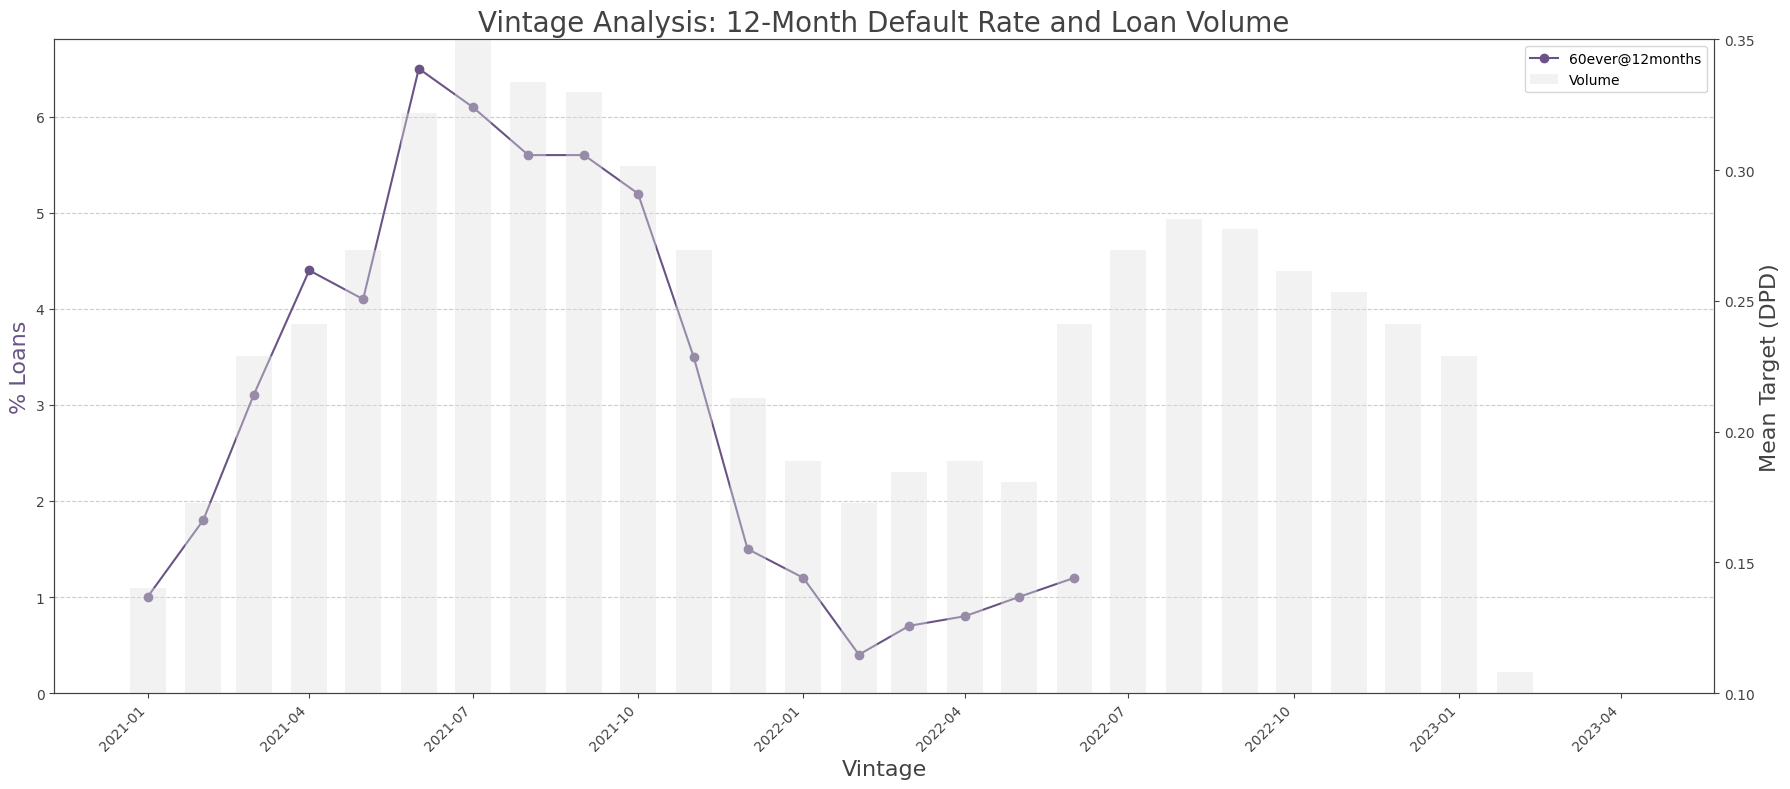

In [34]:

color_palette = {
    'text': '#424242',
    'grid': '#cccccc',
    'line': '#695485', 
    'bars': '#e0e0e0'
}

# --- Datos Estimados ---
dates = pd.to_datetime(pd.date_range(start='2021-01-01', end='2023-04-01', freq='MS'))

bad_rate = [
    1.0, 1.8, 3.1, 4.4, 4.1, 6.5, 6.1, 5.6, 5.6, 5.2, 3.5, 1.5, 1.2, 
    0.4, 0.7, 0.8, 1.0, 1.2
]
bad_rate.extend([np.nan] * (len(dates) - len(bad_rate)))

# Datos de volumen originales para mantener la forma
original_volume = np.array([
    1.0, 1.8, 3.2, 3.5, 4.2, 5.5, 6.2, 5.8, 5.7, 5.0, 4.2, 2.8, 2.2, 
    1.8, 2.1, 2.2, 2.0, 3.5, 4.2, 4.5, 4.4, 4.0, 3.8, 3.5, 3.2, 0.2, 0.0, 0.0
])
# Normalizar los datos para que encajen en el nuevo rango [0.10, 0.35]
min_val = 0.10
max_val = 0.35
# Se añade un pequeño valor para evitar división por cero si todos los valores son iguales
scaled_volume = min_val + (original_volume - original_volume.min()) * (max_val - min_val) / (original_volume.max() - original_volume.min() + 1e-9)


# --- Creación de la Gráfica de Doble Eje ---
fig, ax1 = plt.subplots(figsize=(18, 8))

# --- Eje Izquierdo (Tasa de Mora) ---
ax1.set_xlabel('Vintage', fontsize=16, color=color_palette['text'])
ax1.set_ylabel('% Loans', fontsize=16, color=color_palette['line'])
ax1.plot(dates, bad_rate, color=color_palette['line'], marker='o', linestyle='-', label='60ever@12months', zorder=2)
ax1.tick_params(axis='y', labelcolor=color_palette['line'])
ax1.set_ylim(0)

# --- Eje Derecho (Volumen) ---
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Target (DPD)', fontsize=16, color=color_palette['text'])
ax2.bar(dates, scaled_volume, width=20, color=color_palette['bars'], alpha=0.4, label='Volume', zorder=1)
ax2.tick_params(axis='y', labelcolor=color_palette['text'])
# CORRECCIÓN AQUÍ: Se establecen los límites del eje Y derecho
ax2.set_ylim(0.10, 0.35)

# --- Títulos y Formato General ---
ax1.set_title('Vintage Analysis: 12-Month Default Rate and Loan Volume', fontsize=20, color=color_palette['text'])
ax1.grid(True, linestyle='--', color=color_palette['grid'], axis='y', zorder=0)
ax2.grid(False)

fig.autofmt_xdate(rotation=45)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

for spine in ax1.spines.values():
    spine.set_edgecolor(color_palette['text'])
for spine in ax2.spines.values():
    spine.set_edgecolor(color_palette['text'])
ax1.tick_params(colors=color_palette['text'], which='both')
ax2.tick_params(colors=color_palette['text'], which='both')

plt.tight_layout()



print(f"Gráfica guardada en: '{file_path}'")

plt.show()